# Proyek Analisis Data: Nama dataset
- Nama: Rifqi Kamaddin Sholeh Lubis
- Email: rifqi.kamaddin@gmail.com
- Id Dicoding: rifqikama177

## Menentukan Pertanyaan Bisnis

---
- Bagaimana trend peminjaman sepeda selama 2 tahun?
- Apakah ada pengaruh jam dan jumlah sepeda yang disewa?
- Apakah ada pengaruh hari dan jumlah sepeda yang disewa?


## Menyaipkan semua library yang dibuthkan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

##### Melihat masing-masing tipe data pada feature.

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


##### Cek data kosong dan duplikat pada masing-masing DataFrame

In [6]:
print(day_df.isna().sum())
print('Jumlah duplikasi day_df:',day_df.duplicated().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Jumlah duplikasi day_df: 0


In [7]:
print(hour_df.isna().sum())
print('Jumlah duplikasi hour_df:',hour_df.duplicated().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Jumlah duplikasi hour_df: 0


##### Cek invalid value pada masing-masing feature.

In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000



|           |   Tipe data                   |   Missing Values      |   Duplicated data |   Inaccurate  value
|---|---|---|---|---|
day_df      |   dteday                           |  -       |   -               |   -
hour_df     | dteday    |   -                   |   -               |   -

### Cleaning Data

##### Merubah tipe data pada feature dteday menjadi datetime.

In [10]:
hour_df['datetime'] = hour_df['dteday'].astype(str) + ' ' + hour_df['hr'].astype(str)+':00:00'
hour_df['dteday'] = hour_df['datetime']


In [11]:
hour_df['dteday'] = pd.to_datetime(hour_df['datetime'])
day_df['dteday'] =  pd.to_datetime(day_df['dteday'])

In [12]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,datetime
0,1,2011-01-01 00:00:00,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011-01-01 0:00:00
1,2,2011-01-01 01:00:00,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011-01-01 1:00:00
2,3,2011-01-01 02:00:00,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2011-01-01 2:00:00
3,4,2011-01-01 03:00:00,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,2011-01-01 3:00:00
4,5,2011-01-01 04:00:00,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,2011-01-01 4:00:00


In [13]:
hour_df.drop(['datetime'], axis=1,inplace=True)

In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Denormalized data pada feature yr.

In [16]:
day_df.yr.replace(0,2011, inplace=True)
day_df.yr.replace(1,2012, inplace=True)
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,2012,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,2012,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,2012,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,2012,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [17]:
hour_df.yr.replace(0,2011, inplace=True)
hour_df.yr.replace(1,2012, inplace=True)
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01 00:00:00,1,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01 01:00:00,1,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01 02:00:00,1,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01 03:00:00,1,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01 04:00:00,1,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31 19:00:00,1,2012,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31 20:00:00,1,2012,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31 21:00:00,1,2012,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31 22:00:00,1,2012,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


#### Denormalize data pada feature temp, atemp, hum, windspeed, dan cnt

In [18]:
day_df['temp'] *= 41
day_df['atemp'] *= 50
day_df['hum'] *= 100
day_df['windspeed'] *= 67
day_df['cnt'] = day_df['casual'] + day_df['registered']
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,1,2011,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,1,2011,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,1,2011,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,1,2011,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,2012,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,728,2012-12-28,1,2012,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,729,2012-12-29,1,2012,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
729,730,2012-12-30,1,2012,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [19]:
hour_df['temp'] *= 41
hour_df['atemp'] *= 50
hour_df['hum'] *= 100
hour_df['windspeed'] *= 67
hour_df['cnt'] = hour_df['casual'] + hour_df['registered']
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01 00:00:00,1,2011,1,0,0,6,0,1,9.84,14.395,81.0,0.0000,3,13,16
1,2,2011-01-01 01:00:00,1,2011,1,1,0,6,0,1,9.02,13.635,80.0,0.0000,8,32,40
2,3,2011-01-01 02:00:00,1,2011,1,2,0,6,0,1,9.02,13.635,80.0,0.0000,5,27,32
3,4,2011-01-01 03:00:00,1,2011,1,3,0,6,0,1,9.84,14.395,75.0,0.0000,3,10,13
4,5,2011-01-01 04:00:00,1,2011,1,4,0,6,0,1,9.84,14.395,75.0,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31 19:00:00,1,2012,12,19,0,1,1,2,10.66,12.880,60.0,11.0014,11,108,119
17375,17376,2012-12-31 20:00:00,1,2012,12,20,0,1,1,2,10.66,12.880,60.0,11.0014,8,81,89
17376,17377,2012-12-31 21:00:00,1,2012,12,21,0,1,1,1,10.66,12.880,60.0,11.0014,7,83,90
17377,17378,2012-12-31 22:00:00,1,2012,12,22,0,1,1,1,10.66,13.635,56.0,8.9981,13,48,61


In [20]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,1,2011,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,1,2011,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,1,2011,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,1,2011,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [21]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01 00:00:00,1,2011,1,0,0,6,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01 01:00:00,1,2011,1,1,0,6,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01 02:00:00,1,2011,1,2,0,6,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01 03:00:00,1,2011,1,3,0,6,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01 04:00:00,1,2011,1,4,0,6,0,1,9.84,14.395,75.0,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore ...

In [22]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,2011.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,2011.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,2012.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,2012.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,2012.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452


In [23]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 15:41:22.858622464,2.501640,2011.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 22:30:00,2.000000,2011.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 21:00:00,3.000000,2012.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 06:30:00,3.000000,2012.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 23:00:00,4.000000,2012.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599


In [24]:
total_customer_month= day_df.groupby(pd.Grouper(key='dteday', freq='1M')).agg({
    'dteday': 'max',
    'casual':'sum',
    'registered' : 'sum',
    'cnt': 'sum',
    #'atemp': 'mean'
})
total_customer_month.index = total_customer_month.index.strftime('%B, %Y')
total_customer_month

,dteday,casual,registered,cnt
dteday,,,,
"January, 2011",2011-01-31,3073,35116,38189
"February, 2011",2011-02-28,6242,41973,48215
"March, 2011",2011-03-31,12826,51219,64045
"April, 2011",2011-04-30,22346,72524,94870
"May, 2011",2011-05-31,31050,104771,135821
"June, 2011",2011-06-30,30612,112900,143512
"July, 2011",2011-07-31,36452,104889,141341
"August, 2011",2011-08-31,28842,107849,136691
"September, 2011",2011-09-30,26545,100873,127418


In [25]:
g1 = day_df.groupby(['yr','mnth']).agg({
    'casual':'sum',
    'registered' : 'sum',
    'cnt': 'sum',
    'atemp': 'mean'
})
g1
#plt.figure(figsize=(15,5))
#plt.plot(g1['mnth'],g1['casual'])

casual  registered     cnt      atemp
yr   mnth                                       
2011 1       3073       35116   38189  10.224479
     2       6242       41973   48215  14.220620
     3      12826       51219   64045  16.264958
     4      22346       72524   94870  22.838745
     5      31050      104771  135821  27.540681
     6      30612      112900  143512  32.327972
     7      36452      104889  141341  35.533008
     8      28842      107849  136691  32.770758
     9      26545      100873  127418  28.427252
     10     25222       98289  123511  22.938811
     11     15594       86573  102167  19.966127
     12      8448       78875   87323  16.493910
2012 1       8969       87775   96744  13.755111
     2       8721       94416  103137  15.726095
     3      31618      133257  164875  21.930411
     4      38456      135768  174224  22.869345
     5      44235      151630  195865  29.025519
     6      43294      159536  202830  31.496600
     7      41705      161902  203607  34.876377
     8      43197      171306  214503  32.376723
     9      43778      174795  218573  29.502657
     10     34538      164303  198841  24.258510
     11     21009      131655  152664  16.769748
     12     13245      110468  123713  16.122061

In [26]:
day_df.groupby('weathersit').agg({
    'weathersit': 'min',
    'casual':'sum',
    'registered' : 'sum',
    'cnt': 'sum',
}).sort_values('cnt', ascending=False)

,weathersit,casual,registered,cnt
weathersit,,,,
1,1,446346,1811606,2257952
2,2,169776,827082,996858
3,3,3895,33974,37869


In [27]:
day_df.groupby('windspeed').agg({
    'casual':'sum',
    'registered' : 'sum',
    'cnt': 'sum',
}).sort_values('cnt', ascending=False)

,casual,registered,cnt
windspeed,,,
11.166689,5302,13997,19299
7.125450,2645,14227,16872
9.166739,2515,13499,16014
7.416900,2476,12955,15431
11.250104,3104,11779,14883
...,...,...,...
23.000229,114,491,605
19.687950,34,472,506
21.208582,9,432,441


In [28]:
total_rent_by_holiday = day_df.groupby('holiday').agg({
    'holiday': 'min',
    'casual':'sum',
    'registered' : 'sum',
    'cnt': 'sum',
})
total_rent_by_holiday

,holiday,casual,registered,cnt
holiday,,,,
0,0,597658,2616586,3214244
1,1,22359,56076,78435


In [29]:
total_rent_by_day = group_by_day = day_df.groupby('weekday').agg({
    'weekday' : 'min',
    'casual':'sum',
    'registered' : 'sum',
    'cnt': 'sum',
})#.sort_values('weekday', ascending=False)
total_rent_by_day

,weekday,casual,registered,cnt
weekday,,,,
0,0,140521,303506,444027
1,1,70784,384719,455503
2,2,57843,411266,469109
3,3,57319,415729,473048
4,4,61460,423935,485395
5,5,78238,409552,487790
6,6,153852,323955,477807


In [30]:
total_rent_by_hour = hour_df.groupby('hr').agg({
    'hr' : 'min',
    'casual':'sum',
    'registered' : 'sum',
    'cnt': 'sum',
}).sort_values('cnt', ascending=False)
total_rent_by_hour

,hr,casual,registered,cnt
hr,,,,
17,17,54220,282640,336860
18,18,44496,265276,309772
8,8,15761,245240,261001
16,16,53834,173914,227748
19,19,35505,191284,226789
13,13,52713,132206,184919
12,12,49718,134696,184414
15,15,54606,128543,183149
14,14,55089,120563,175652


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana trend peminjaman sepeda selama 2 tahun?

Index(['dteday', 'casual', 'registered', 'cnt'], dtype='object')


c:\Users\Rifqi Kamaddin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Rifqi Kamaddin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Rifqi Kamaddin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Rifqi Kamaddin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:111

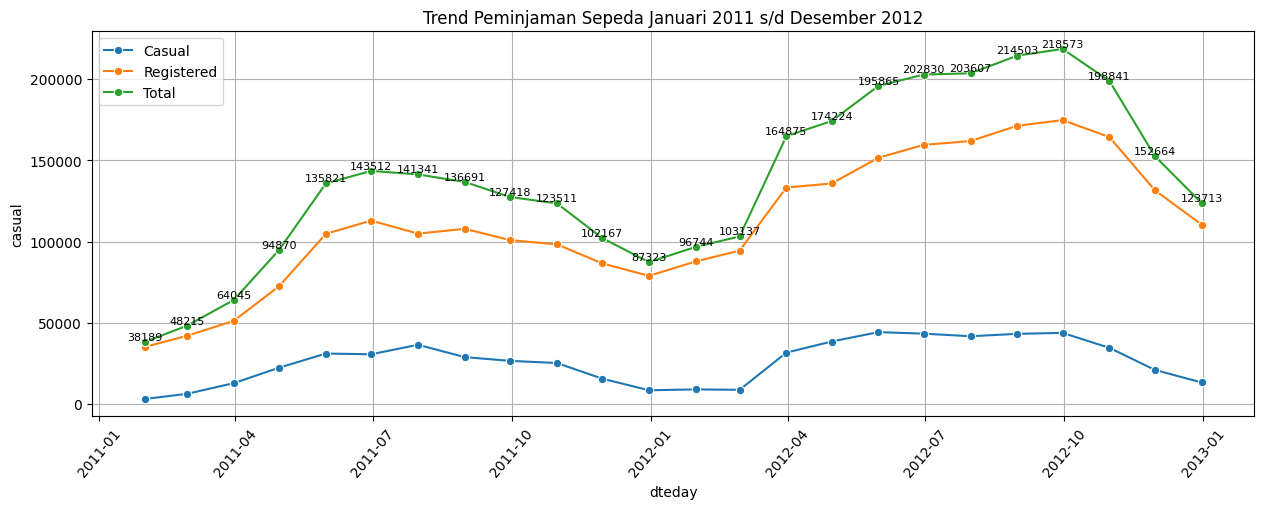

In [31]:
plt.figure(figsize=(15,5))
print(total_customer_month.columns)
sns.lineplot(data=total_customer_month, x='dteday', y='casual', marker='o', label='Casual')
sns.lineplot(data=total_customer_month, x='dteday', y='registered', marker='o', label='Registered')
sns.lineplot(data=total_customer_month, x='dteday', y='cnt', marker='o', label='Total')
plt.title('Trend Peminjaman Sepeda Januari 2011 s/d Desember 2012')
plt.legend()
plt.grid(True)

plt.xticks(rotation=50)
for i, row in total_customer_month.iterrows():
#    plt.text(row['dteday'], row['casual'], f"{row['casual']}", ha='center', va='bottom', fontsize=12)
#    plt.text(row['dteday'], row['registered'], f"{row['registered']}", ha='center', va='bottom', fontsize=12)
    plt.text(row['dteday'], row['cnt'], f"{row['cnt']}", ha='center', va='bottom', fontsize=8)
    
plt.show()

### Pertanyaan 2: Apakah ada pengaruh jam dan jumlah sepeda yang disewa?

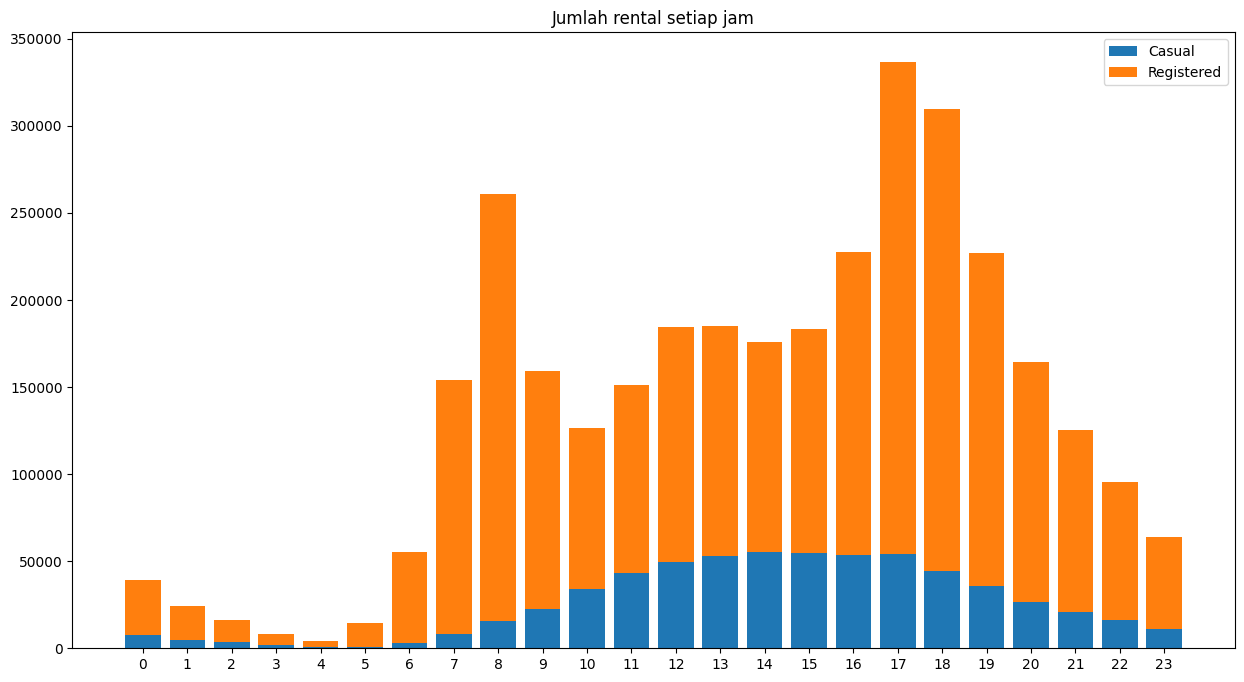

In [32]:
fig, ax = plt.subplots(figsize=(15, 8))
cumval = 0
for col in total_rent_by_hour.columns[~total_rent_by_hour.columns.isin(['hr','cnt'])]:
    bars = ax.bar(total_rent_by_hour.hr, total_rent_by_hour[col], bottom=cumval, label=col)
    cumval = cumval+total_rent_by_hour[col]
    #ax.bar_label(bars, fmt='%.1f', label_type='center', fontsize=8)
ax.set_xticks(total_rent_by_hour.hr)
ax.set_xticklabels(total_rent_by_hour.hr, rotation=0)
ax.legend(['Casual','Registered','Total'])
ax.set_title('Jumlah rental setiap jam')    
plt.show()

### Pertanyaan 3: Apakah ada pengaruh hari dan jumlah sepeda yang disewa?

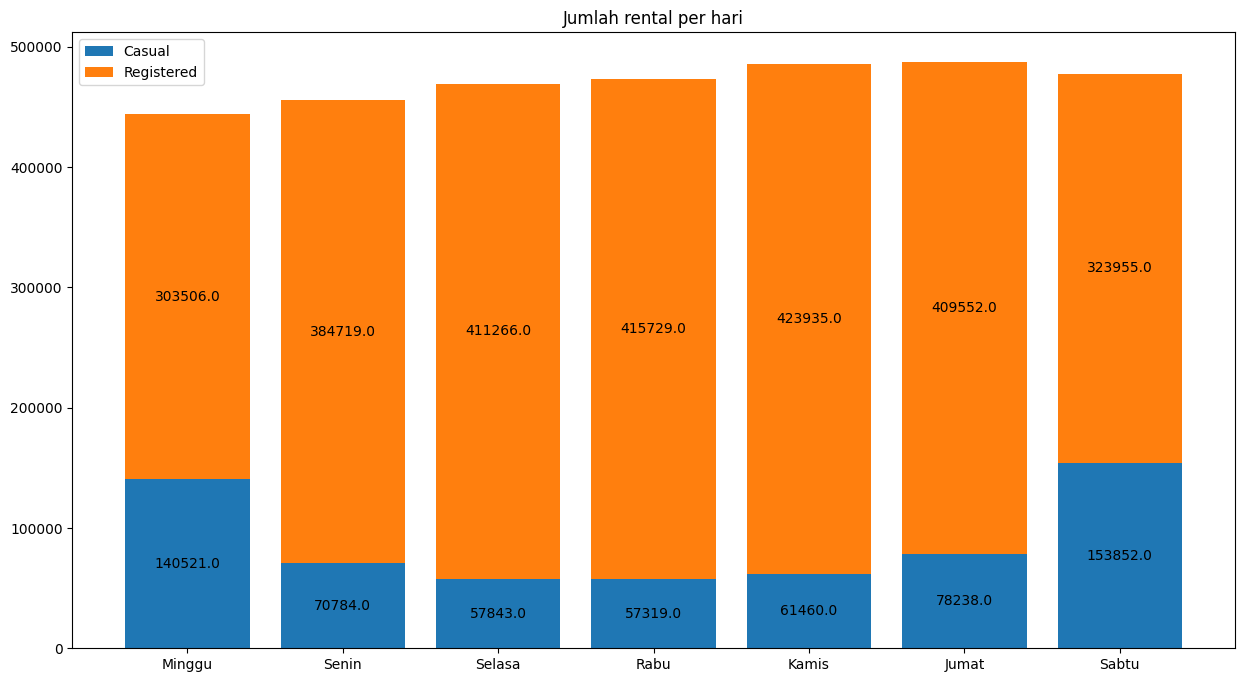

In [33]:
fig, ax = plt.subplots(figsize=(15, 8))
cumval = 0
for col in total_rent_by_day.columns[~total_rent_by_day.columns.isin(['weekday','cnt'])]:
    bars = ax.bar(total_rent_by_day.weekday, total_rent_by_day[col], bottom=cumval, label=col)
    cumval = cumval+total_rent_by_day[col]
    ax.bar_label(bars, fmt='%.1f', label_type='center')
ax.set_xticks(total_rent_by_day.weekday)
ax.set_xticklabels(['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'], rotation=0)
ax.legend(['Casual','Registered','Total'])
ax.set_title('Jumlah rental per hari')
plt.show()

## Conclusion

- Berdasarkan grafik Trend Peminjaman Sepeda Januari 2011 s/d Desember 2012, dapat dilihat bahwa total sepeda yang dirental mengalami peningkatan mulai januari 2011 sampai juni 2011 dan kemudian mengalami penurunan sampai desember 2011. Saat januari 2012 sampai dengan september 2012 kembali mengalami peningkatan dan mulai mengalami penurunan mulai dari oktober 2012 sampai dengan desember 2012. Hal ini dapat terjadi karena pada akhir tahun mulai memasuki musim dingin sehingga minat penggunaan sepeda menurun.

- Berdasarkan grafik Jumlah rental sepeda setiap jam, dapat dilihat bahwa sepeda banyak di rental mulai dari jam 5 pagi hingga jam 9 malam, dengan jam puncak berada pada jam 8 pagi dan jam 5 - 6 sore.

- Berdasarkan grafik Jumlah rentar per hari, dapat dilihat bahwa jumlah sepeda yang dirental setiap harinya relatif sama. Terdapat juga peningkatan untuk jumlah pengguna Casual pada hari sabtu dan minggu.
